In [1]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = make_regression(n_samples=100, n_features=2, n_informative=2, noise=18)

In [3]:
X, Y = data

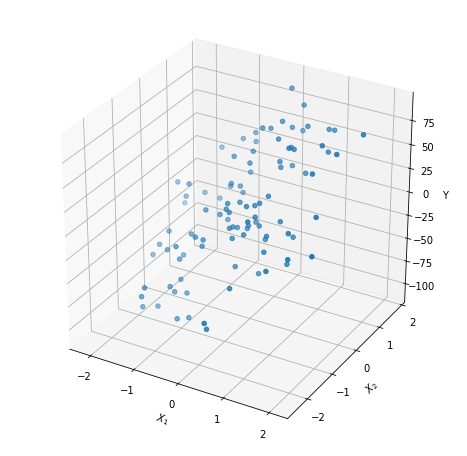

In [4]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.T[0], X.T[1], Y);
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('Y');

In [5]:
model = LinearRegression()

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)

/usr/local/lib64/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [8]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
predictions = model.predict(X_test)

In [10]:
SS_res = np.sum((Y_test - predictions) ** 2)

mean = np.mean(Y_test)
SS_tot = np.sum((Y_test - mean) ** 2)

R_sq = 1 - SS_res / SS_tot
print(R_sq)

0.8216961351957983


In [11]:
model.score(X_test, Y_test)

0.8216961351957983

In [12]:
R_sq_adj = 1 - (1 - R_sq) * (100 - 1) / (100 - 2 - 1)
print(R_sq_adj)

0.8180197668493199


## Confidence intervals and p-values

In [13]:
import statsmodels.api as sm

In [14]:
X2 = sm.add_constant(X_train)

In [15]:
results = sm.OLS(Y_train, X2).fit()

In [16]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           1.10e-27
Time:                        23:43:40   Log-Likelihood:                -303.06
No. Observations:                  70   AIC:                             612.1
Df Residuals:                      67   BIC:                             618.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3118      2.307      1.436      0.1

In [17]:
results = sm.OLS(Y_train, X_train).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           7.35e-28
Time:                        23:43:40   Log-Likelihood:                -304.12
No. Observations:                  70   AIC:                             612.2
Df Residuals:                      68   BIC:                             616.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            26.9698      2.174     12.407      0.0

In [18]:
model.coef_

array([27.66152575, 36.59053409])

## Residuals vs fitted values

In [19]:
fitted = model.coef_[0] * X.T[0] + model.coef_[1] * X.T[1]
residuals = Y - fitted

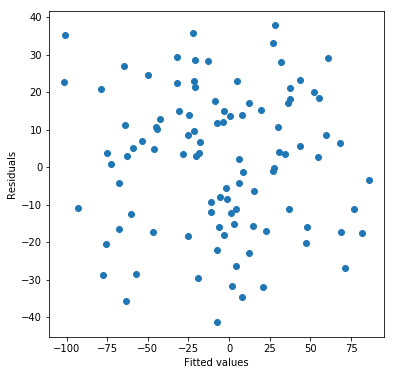

In [23]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(fitted, residuals);
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals');

In [24]:
np.corrcoef(residuals, fitted)

array([[ 1.      , -0.042772],
       [-0.042772,  1.      ]])